In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import (KFold, train_test_split)
from matplotlib import cm
from sklearn.metrics import mean_squared_error as mse
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

## Importing and Spliting Data

In [182]:
# Import Data
url = 'https://raw.githubusercontent.com/pgardocki3/ME8813ML/master/Project%208813/superconductor.csv'
df = pd.read_csv(url)

df=(df-df.mean())/df.std()

# Split data into train/test sets
X = df.iloc[:,0:-2]
X1 = df.iloc[:,1:11]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)


df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,-0.080056,0.046732,-0.451640,-0.158846,-0.611805,0.044357,-0.003707,0.133722,-0.053037,0.378177,...,-0.752138,-0.805893,-0.711688,0.186288,0.035182,-0.837939,-0.406157,-0.838353,-0.520057,-0.158264
1,0.614729,0.174265,-0.432061,0.059367,-0.604166,0.777412,-0.015267,0.133722,0.108898,0.134898,...,-0.752138,-1.116705,-0.719437,0.664955,-0.014779,-0.033010,-0.362343,-0.426856,-0.450811,-0.245844
2,-0.080056,0.046732,-0.450967,-0.158846,-0.611644,0.044357,-0.218978,0.133722,0.093292,0.378177,...,-0.740146,-0.805893,-0.700712,0.186288,-0.062233,-0.837939,-0.376948,-0.838353,-0.503292,-0.450197
3,-0.080056,0.046732,-0.451304,-0.158846,-0.611724,0.044357,-0.103613,0.133722,0.020127,0.378177,...,-0.746142,-0.805893,-0.706208,0.186288,-0.010537,-0.837939,-0.391552,-0.838353,-0.511512,-0.362617
4,-0.080056,0.046732,-0.452314,-0.158846,-0.611966,0.044357,0.162771,0.133722,-0.199367,0.378177,...,-0.764131,-0.805893,-0.722601,0.186288,0.113625,-0.837939,-0.435366,-0.838353,-0.538165,-0.333424


### Pearson Correlation

                         mean_atomic_mass  wtd_mean_atomic_mass  \
mean_atomic_mass                 1.000000              0.815977   
wtd_mean_atomic_mass             0.815977              1.000000   
gmean_atomic_mass                0.940298              0.848242   
wtd_gmean_atomic_mass            0.745841              0.964085   
entropy_atomic_mass             -0.104000             -0.308046   
wtd_entropy_atomic_mass         -0.097609             -0.412666   
range_atomic_mass                0.125659             -0.144029   
wtd_range_atomic_mass            0.446225              0.716623   
std_atomic_mass                  0.196460             -0.060739   
wtd_std_atomic_mass              0.130675             -0.089471   

                         gmean_atomic_mass  wtd_gmean_atomic_mass  \
mean_atomic_mass                  0.940298               0.745841   
wtd_mean_atomic_mass              0.848242               0.964085   
gmean_atomic_mass                 1.000000             

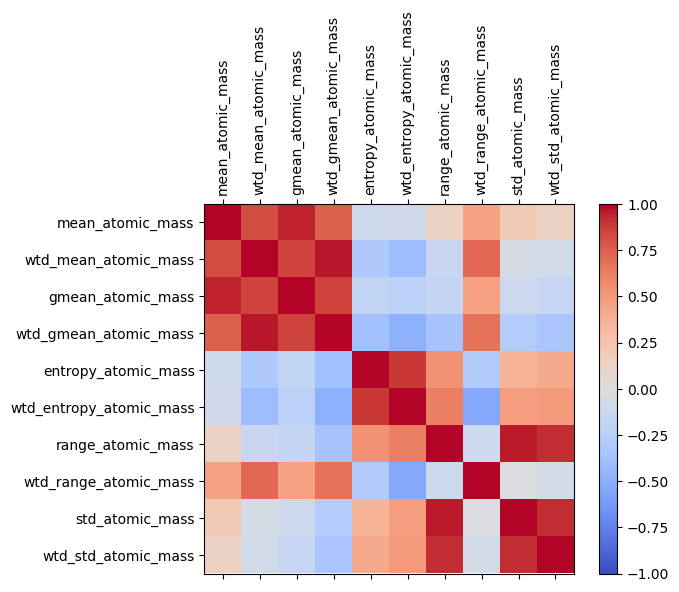

In [4]:
corr = X1.corr()
print(corr)
fig = plt.figure()
#plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X1.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X1.columns)
ax.set_yticklabels(X1.columns)
plt.show()

### PCA

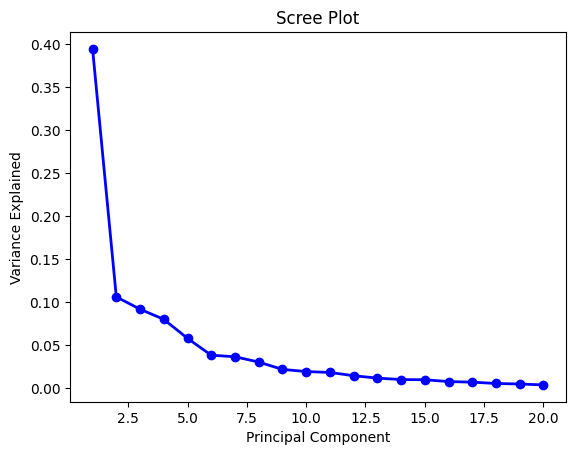

0.9701886952367491


In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scalar = StandardScaler()
scaled_df = X.copy()
scaled_df = pd.DataFrame(scalar.fit_transform(scaled_df),columns=scaled_df.columns)

# Perform PCA
pca = PCA(n_components=20)
pca.fit(scaled_df)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
print(sum(pca.explained_variance_ratio_))

# ANN

## No PCA

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 70)                5670      
                                                                 
 dense_5 (Dense)             (None, 70)                4970      
                                                                 
 dense_6 (Dense)             (None, 70)                4970      
                                                                 
 dense_7 (Dense)             (None, 70)                4970      
                                                                 
 dense_8 (Dense)             (None, 1)                 71        
                                                                 
Total params: 20,651
Trainable params: 20,651
Non-trainable params: 0
_________________________________________________________________


C:\Users\Patrick Gardocki\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Test Accuracy: 0.900
167/167 [==============================] - 0s 596us/step
Train Accuracy:  0.9552965760231018
MSE 0.3008972024825362


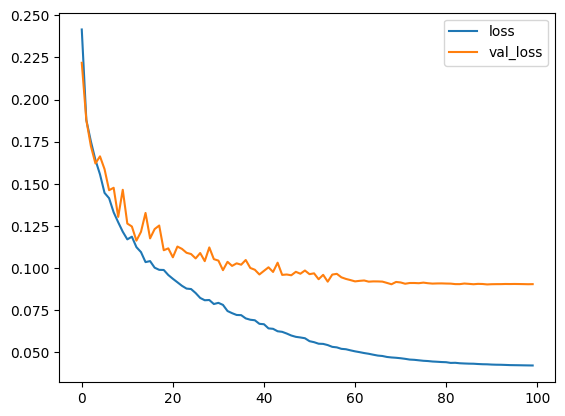

In [61]:
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow_addons.metrics import RSquare

initial_learning_rate = 0.1
epochs = 100
decay = initial_learning_rate / epochs

def r_squared(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)


input_shape = [X_train.shape[1]]
model = tf.keras.Sequential([
    tf.keras.Input(shape=(80,)),
    tf.keras.layers.Dense(units=70, activation='relu', 
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=70, activation='relu'),
    tf.keras.layers.Dense(units=70, activation='relu'),
    tf.keras.layers.Dense(units=70, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])
model.summary()

model.compile(optimizer='adam', loss='mse', metrics=[r_squared])

losses = model.fit(X_train, y_train,
                   validation_data=(X_test,y_test),
                   epochs=100,
                   verbose=0,
                   callbacks=[LearningRateScheduler(lr_time_based_decay,verbose=0)]
                   )

loss1, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
y_pred = model.predict(X_test)

loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()

print('Train Accuracy: ',losses.history['r_squared'][-1])
loss = mse(y_test,y_pred, squared=False)
print('MSE', loss)


# Plot
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')
# ax.scatter(X_train.iloc[:,0],X_train.iloc[:,1],y_train,label='data')
# ax.scatter(X_test.iloc[:,0],X_test.iloc[:,1],y_pred.reshape(-1,1))
# plt.show()
# plt.plot(losses.history['r_squared'])



0.9552965760231018


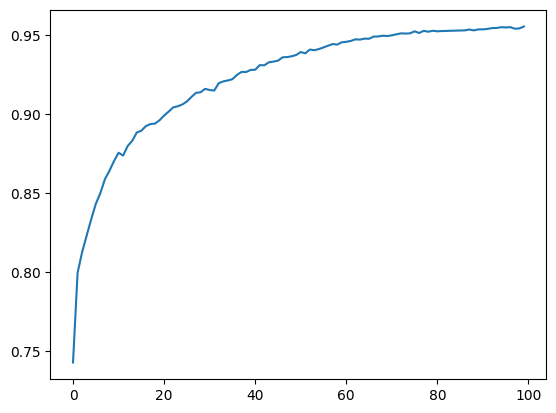

In [62]:
plt.plot(losses.history['r_squared'])
print(losses.history['r_squared'][-1])
# from tensorflow_addons.metrics.r_square import RSquare
# metric = RSquare()
# metric.update_state(y_test, y_pred)
# result = metric.result()
# result.numpy()


## W/ PCA

In [60]:

data = pca.transform(scaled_df)
X_train_pca, X_test_pca = train_test_split(data, test_size=.25, random_state=1)
def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

input_shape = [X_train_pca.shape[1]]
model = tf.keras.Sequential([
    tf.keras.Input(shape=(20,)),
    tf.keras.layers.Dense(units=80,activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=80,activation='relu'),
    tf.keras.layers.Dense(units=80,activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])
model.summary()

model.compile(optimizer='adam',loss='mse', metrics=[r_squared])

losses = model.fit(X_train_pca, y_train,
                   validation_data=(X_test_pca,y_test),
                   epochs=100,
                   verbose=0,
                   callbacks=[LearningRateScheduler(lr_time_based_decay,verbose=0)]
                   )
loss1, acc = model.evaluate(X_test_pca, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

y_pred = model.predict(X_test_pca)

loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()


loss = mse(y_test,y_pred, squared=False)
print('MSE', loss)
print('Train Accuracy: ',losses.history['r_squared'][-1])
# model.optimizer.get_config()


NameError: name 'pca' is not defined

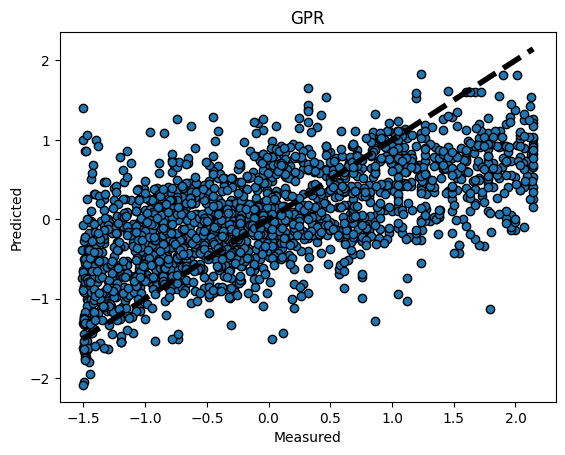

In [150]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('GPR')
plt.show()





## GPR

In [19]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Exponentiation
from sklearn.model_selection import cross_val_score

# Selecting data

data = pca.transform(scaled_df)
X_train_pca, X_test_pca = train_test_split(data, test_size=.25, random_state=1)
kernel = RBF() + WhiteKernel()
        
gpr = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=2, alpha=1e-10)
gpr.fit(X_train_pca, y_train)
y_pred = gpr.predict(X_test_pca)
score = cross_val_score(gpr,X_test_pca, y_test, cv=2)
print(score)
loss = mse(y_test,y_pred, squared=False)
print('MSE', loss)
print(f"RBF Lengthscale: {gpr.kernel_}")

# Plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train.iloc[:,0],X_train.iloc[:,1],y_train,label='data')
ax.scatter(X_test.iloc[:,0],X_test.iloc[:,1],y_pred.reshape(-1,1))

plt.show()

KeyboardInterrupt: 

## LASSO

Mean MAE: 0.736 (0.014)
MSE 0.5216801883543057


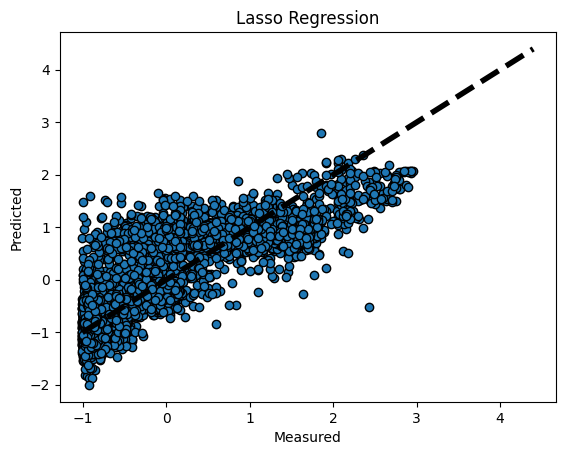

In [14]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict

# Selecting data


model = linear_model.Ridge(alpha=.001)
cv = sk.model_selection.RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = sk.model_selection.cross_val_score(model,X_train, y_train, cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


model.fit(X_train, y_train)
y_pred = model.predict(X_test)
loss = mse(y_test,y_pred, squared=False)
print('MSE', loss)
# print("* Model coefficients:")
# print("  w0:", model.intercept_)
# print("  w1:", model.coef_[0])

# Plot
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')
# ax.scatter(X_train.iloc[:,0],X_train.iloc[:,1],y_train,label='data')
# ax.scatter(X_test.iloc[:,0],X_test.iloc[:,1],y_pred.reshape(-1,1),
#                        linewidth=0, antialiased=False)

plt.show();


# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(model, X_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_title('Lasso Regression')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [183]:
# Building a simple neural network
import keras
import tensorflow as tf
def build_model():
    model=keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=[80,]),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    #No activation is used in the last layer as this is regression
    optimizer= tf.keras.optimizers.Adam(0.001)
    
    model.compile(loss='mse',
                 optimizer= optimizer,
                 metrics= ['mae', 'mse'])
    return model

In [184]:
model= build_model()
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 64)                5184      
                                                                 
 dense_77 (Dense)            (None, 64)                4160      
                                                                 
 dense_78 (Dense)            (None, 64)                4160      
                                                                 
 dense_79 (Dense)            (None, 1)                 65        
                                                                 
Total params: 13,569
Trainable params: 13,569
Non-trainable params: 0
_________________________________________________________________


In [185]:
# Setting 'restore_best_weights' as True helps restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=40, verbose=1, mode='min', restore_best_weights=False)
from sklearn.model_selection import cross_val_score
# data = pca.transform(scaled_df)
# X_train_pca, X_test_pca = train_test_split(data, test_size=.25, random_state=1)
history= model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_test, y_test),
    verbose=0, #set verbose=1 for full details at every epoch
    callbacks= [early_stopping_cb])

loss, mae, mse= model.evaluate(X_test, y_test, verbose=2)
# kfold = KFold(n_splits=10, shuffle=True, random_state=123)
# score = cross_val_score(history, X_train, y_train,fit_params = 'mse')

print("Test-set Mean absolute error: {:5.2f}".format(mae)) # test mae- 36286
# print("Cross Val Score: {:5.2f}".format(score))

Epoch 185: early stopping
167/167 - 0s - loss: 0.0983 - mae: 0.1877 - mse: 0.0983 - 243ms/epoch - 1ms/step
Test-set Mean absolute error:  0.19


Text(0.5, 1.0, 'Train - MAE')

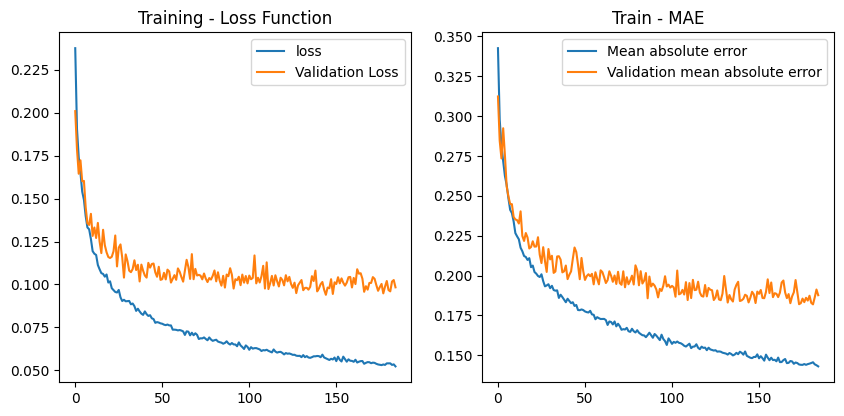

In [186]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['mae'], label='Mean absolute error')
plt.plot(history.history['val_mae'], label='Validation mean absolute error')
plt.legend()
plt.title('Train - MAE')

167/167 [==============================] - 0s 1ms/step


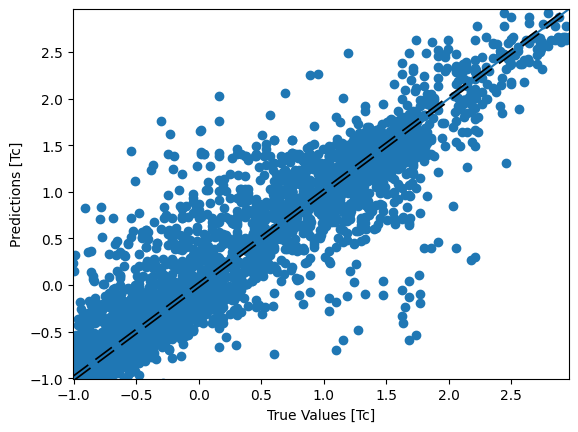

In [187]:
y_pred_test= model.predict(X_test).flatten()

# plt.axes(aspect='equal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.scatter(y_test, y_pred_test,)

plt.xlabel('True Values [Tc]')
plt.ylabel('Predictions [Tc]')

lims=[min(y_test), max(y_test)]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

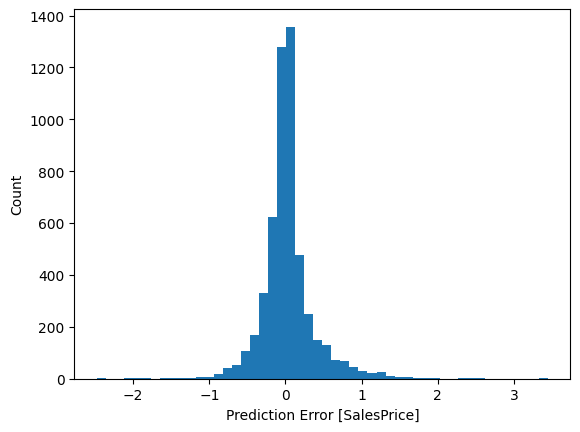

In [158]:
error= y_pred_test-y_test
plt.hist(error, bins=50)
plt.xlabel('Prediction Error [SalesPrice]')
_=plt.ylabel('Count')

In [188]:
# Accuracy metrics :
from sklearn.metrics import r2_score, mean_squared_error
y_pred_train= model.predict(X_train).flatten()

print("Accuracy obtained using x_train and x_val sets from the original x!")

print("Training accuracy: ",r2_score(y_train, y_pred_train))

print("Test accuracy: ",r2_score(y_test, y_pred_test))

print("Test mean-squared error: ",np.sqrt(mean_squared_error(y_test, y_pred_test, squared=False)))

score = mean_squared_error(y_test, y_pred_test)
print('RMSE: %.3f' % score**(.5))
#Hence the current test accuracy is 0.48385 and Test MSE is 59703.04
# Note- adding a droput layer decreases the accuracy to 0.46

499/499 [==============================] - 0s 906us/step
Accuracy obtained using x_train and x_val sets from the original x!
Training accuracy:  0.9487893229489203
Test accuracy:  0.899615230030181
Test mean-squared error:  0.5599801978699698
RMSE: 0.314


In [ ]:
https://www.kaggle.com/code/panks03/optimizing-neural-network-with-kerastuner/notebook

## XGBoost

[0]	validation_0-rmse:0.84322	validation_1-rmse:0.84076
[1]	validation_0-rmse:0.65390	validation_1-rmse:0.65789
[2]	validation_0-rmse:0.53181	validation_1-rmse:0.54068
[3]	validation_0-rmse:0.45392	validation_1-rmse:0.46825
[4]	validation_0-rmse:0.40728	validation_1-rmse:0.42746
[5]	validation_0-rmse:0.36818	validation_1-rmse:0.39330
[6]	validation_0-rmse:0.34392	validation_1-rmse:0.37365
[7]	validation_0-rmse:0.32970	validation_1-rmse:0.36089
[8]	validation_0-rmse:0.31626	validation_1-rmse:0.35171
[9]	validation_0-rmse:0.30288	validation_1-rmse:0.34433
[10]	validation_0-rmse:0.29413	validation_1-rmse:0.33988
[11]	validation_0-rmse:0.28546	validation_1-rmse:0.33444
[12]	validation_0-rmse:0.27955	validation_1-rmse:0.33072
[13]	validation_0-rmse:0.27426	validation_1-rmse:0.32793
[14]	validation_0-rmse:0.27109	validation_1-rmse:0.32641
[15]	validation_0-rmse:0.26796	validation_1-rmse:0.32418
[16]	validation_0-rmse:0.26641	validation_1-rmse:0.32333
[17]	validation_0-rmse:0.26321	validation

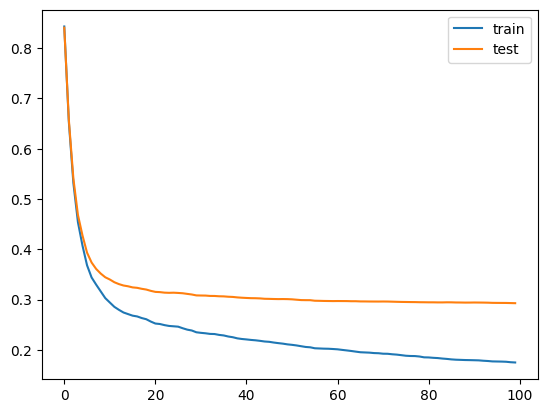

In [189]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
# define the model
model = xgb.XGBRegressor()

# define the datasets to evaluate each iteration
evalset = [(X_train, y_train), (X_test,y_test)]

# fit the model
model.fit(X_train, y_train, eval_set=evalset)

# evaluate performance
yhat = model.predict(X_test)
score = mean_squared_error(y_test, yhat)
print('RMSE: %.3f' % score**(.5))

results = model.evals_result()

# plot learning curves
plt.plot(results['validation_0']['rmse'], label='train')
plt.plot(results['validation_1']['rmse'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

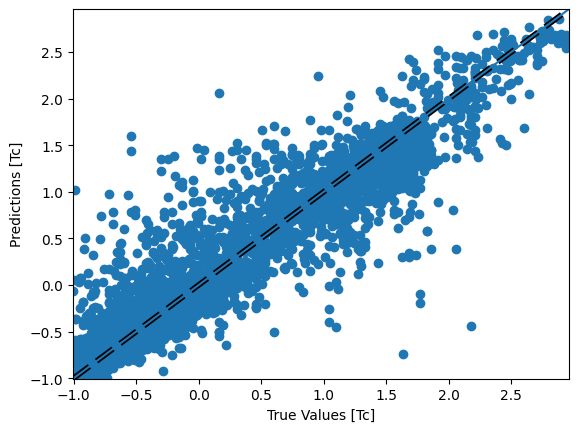

In [190]:
y_pred_test= model.predict(X_test).flatten()

# plt.axes(aspect='equal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.scatter(y_test, y_pred_test,)

plt.xlabel('True Values [Tc]')
plt.ylabel('Predictions [Tc]')

lims=[min(y_test), max(y_test)]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)



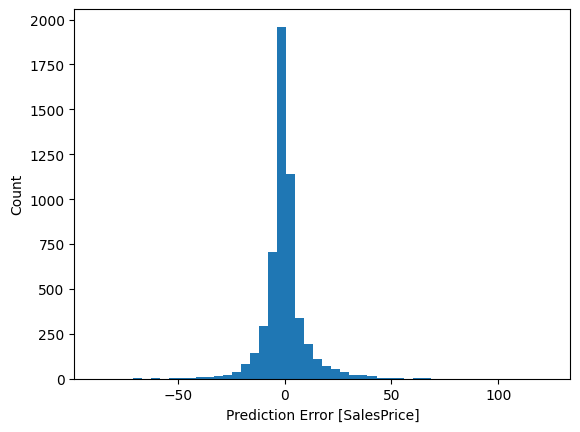

In [141]:
error= y_pred_test-y_test
plt.hist(error, bins=50)
plt.xlabel('Prediction Error [SalesPrice]')
_=plt.ylabel('Count')

In [161]:
y_pred_train= model.predict(X_train).flatten()

print("Accuracy obtained using x_train and x_val sets from the original x!")

print("Training accuracy: ",r2_score(y_train, y_pred_train))

print("Test accuracy: ",r2_score(y_test, yhat))

print("Test mean-squared error: ",np.sqrt(mean_squared_error(y_test, yhat, squared=False)))


ms = np.sqrt(np.average((y_test-y_pred_test)**2))
print(ms)

499/499 [==============================] - 1s 1ms/step
Accuracy obtained using x_train and x_val sets from the original x!
Training accuracy:  0.9053587535502041
Test accuracy:  -2234.5199120809675
Test mean-squared error:  6.840696904571423
0.34704031355498927
